In [1]:
### Importing all the packages
import requests
import urllib.request
import time
import spacy
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import nltk
import re
import unicodedata
from nltk.corpus import stopwords
import tweepy
from textblob import TextBlob

In [2]:
#### Cleaning text 
### reference (https://github.com/kaparker/gameofthrones-wordclouds/blob/master/gotwordcloud.py)

def removetitle(text):
    return re.sub(r'.*:', '', text)

def removebrackets(text):
    return re.sub('[\(\[].*?[\)\]]', ' ', text)

def remove_accented_chars(text):
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

def remove_special_chars(text, remove_digits=False):
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    return re.sub(pattern, '', text)

def remove_stopwords(text):
    stopword_list = stopwords.words('english')
    tokens = nltk.word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    return ' '.join([token for token in tokens if token not in stopword_list])

def lemmatize(text):
    text = nlp(text)
    return ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])


## Getting data from news article and other google url sources

In [3]:
## Making our google query ready
topic="Omdena AI"
numResults=3000
url ="https://www.google.com/search?q="+topic+"&tbm=nws&hl=en&num="+str(numResults)

In [4]:
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [5]:
results = soup.find_all("div", attrs = {"class": "ZINbbc"})

In [6]:
descriptions = []
for result in results:
    try:
        description = result.find("div", attrs={"class":"s3v9rd"}).get_text()
        if description != "": 
            descriptions.append(description)
    except:
        continue

In [7]:
text = "".join(descriptions)

In [8]:
len(text.split("."))

143

In [9]:
text.split(".")

['2 months ago · Omdena is a company that uses its expansive community of voluntary engineers to create lasting change through projects that take just two',
 '',
 '',
 '4 months ago · Omdena is a global platform that uses a bottom-up collaborative model to build AI and ML solutions',
 ' People from all over the world come',
 '',
 '',
 '12 months ago · Omdena and its Covid19 project are displayed on the Nasdaq billboard in ',
 '',
 '',
 ' Omdena is an innovation platform for building AI solutions to',
 '',
 '',
 '4 months ago · A leader in collaborative AI development, Omdena believes that truly great startups should build solutions that positively change the world by',
 '',
 '',
 '17 months ago · Omdena is a collaborative platform for building AI solutions to real-world problems through the power of bottom up collaboration',
 ' More From',
 '',
 '',
 '13 months ago · Rudradeb Mitra, is the Founder of Omdena a global platform where a community of changemakers building AI solutions to re

In [10]:
import pandas as pd
import numpy as np
google_text_data=[x if len(x)>20 else np.nan for x in text.split(".")]
### we dont require text less than 20 characters

In [11]:
g_df=pd.DataFrame()
g_df['Text']=google_text_data

In [12]:
g_df.dropna(inplace=True)

In [13]:
g_df

,Text
0,2 months ago · Omdena is a company that uses i...
3,4 months ago · Omdena is a global platform tha...
4,People from all over the world come
7,12 months ago · Omdena and its Covid19 project...
10,Omdena is an innovation platform for building...
13,4 months ago · A leader in collaborative AI de...
16,17 months ago · Omdena is a collaborative plat...
20,"13 months ago · Rudradeb Mitra, is the Founder..."
23,"7 months ago · Bambini introduced on Omdena, a..."
29,the African Centre for Economic Transformatio...


In [14]:
for tweet in g_df['Text']:
    print(tweet)
    analysis = TextBlob(tweet)
    print(analysis.sentiment)


2 months ago · Omdena is a company that uses its expansive community of voluntary engineers to create lasting change through projects that take just two
Sentiment(polarity=0.0, subjectivity=0.0)
4 months ago · Omdena is a global platform that uses a bottom-up collaborative model to build AI and ML solutions
Sentiment(polarity=0.0, subjectivity=0.0)
 People from all over the world come
Sentiment(polarity=0.0, subjectivity=0.0)
12 months ago · Omdena and its Covid19 project are displayed on the Nasdaq billboard in 
Sentiment(polarity=0.0, subjectivity=0.0)
 Omdena is an innovation platform for building AI solutions to
Sentiment(polarity=0.0, subjectivity=0.0)
4 months ago · A leader in collaborative AI development, Omdena believes that truly great startups should build solutions that positively change the world by
Sentiment(polarity=0.5136363636363637, subjectivity=0.6477272727272727)
17 months ago · Omdena is a collaborative platform for building AI solutions to real-world problems thro

In [15]:
text_title=removetitle(text)
text_brackets=removebrackets(text_title)
text_clean=remove_accented_chars(text_brackets)
text_clean=text_clean.lower()
text_clean=remove_special_chars(text_clean)
text_clean=remove_stopwords(text_clean)

In [16]:
## Our resultant text
text_clean

'rudradeb founder omdena oversees monitors developments recognition achievements made ai big data24 months ago one upcoming startups omdena building educational platform ai enthusiasts students collaborate organizations on13 months ago one partners omdena calling ai entrepreneurs help governments design datadriven policy via coronavirus challenge12 months ago additional startup presence mexico orion startupsbacked omdena recently partnered united nations ai for12 months ago applying ai analyze domestic violence lockdowns data building ml classifier harshita chopra omdena14 months ago en turquie des experts en ia de la plateforme collaborative omdena ai ont developpe un prototype dia specialement pense pour resoudre ce14 months ago sztucznej inteligencji uczenia maszynowego zebranych przez omdena w ramach ai good challenge po przebadac modych ludzi13 months ago hiervoor gaat fruitpunch ai samenwerken met omdena een wereldwijd aiplatform uit de vs ondertussen zitten bijna alle scholieren

### Let us try to get data from twitter and also perform sentiment ananlysis on it

In [17]:
# Step 1 - Authenticate
consumer_key= ''
consumer_secret= ''

access_token=''
access_token_secret=''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

#Step 3 - Retrieve Tweets
public_tweets = api.search('Omdena')
tweets_list=[]
for tweet in public_tweets:
    print(tweet.text)
    tweets_list.append(tweet.text)
    #Step 4 Perform Sentiment Analysis on Tweets
    analysis = TextBlob(tweet.text)
    print(analysis.sentiment)
    print("")

RT @neo4j: Omdena AI ( @OmdenaAI) launches a project to boost Kenya's efforts to restore degraded land in an equitable way, using tools inc…
Sentiment(polarity=0.0, subjectivity=0.0)

RT @neo4j: Omdena AI ( @OmdenaAI) launches a project to boost Kenya's efforts to restore degraded land in an equitable way, using tools inc…
Sentiment(polarity=0.0, subjectivity=0.0)

RT @neo4j: Omdena AI ( @OmdenaAI) launches a project to boost Kenya's efforts to restore degraded land in an equitable way, using tools inc…
Sentiment(polarity=0.0, subjectivity=0.0)

Omdena AI ( @OmdenaAI) launches a project to boost Kenya's efforts to restore degraded land in an equitable way, us… https://t.co/iU5RhzIQMF
Sentiment(polarity=0.0, subjectivity=0.0)

RT @OmdenaAI: How to Build a Data Science Portfolio in 2021 That Gets You a Top Job

11 proven Do's and Don'ts you need to know to build yo…
Sentiment(polarity=0.5, subjectivity=0.5)

RT @OmdenaAI: How to Build a Data Science Portfolio in 2021 That Gets You a Top 

In [18]:
twitter_text=''
for x in public_tweets:
    twitter_text+=x.text

In [19]:
twitter_text

"RT @neo4j: Omdena AI ( @OmdenaAI) launches a project to boost Kenya's efforts to restore degraded land in an equitable way, using tools inc…RT @neo4j: Omdena AI ( @OmdenaAI) launches a project to boost Kenya's efforts to restore degraded land in an equitable way, using tools inc…RT @neo4j: Omdena AI ( @OmdenaAI) launches a project to boost Kenya's efforts to restore degraded land in an equitable way, using tools inc…Omdena AI ( @OmdenaAI) launches a project to boost Kenya's efforts to restore degraded land in an equitable way, us… https://t.co/iU5RhzIQMFRT @OmdenaAI: How to Build a Data Science Portfolio in 2021 That Gets You a Top Job\n\n11 proven Do's and Don'ts you need to know to build yo…RT @OmdenaAI: How to Build a Data Science Portfolio in 2021 That Gets You a Top Job\n\n11 proven Do's and Don'ts you need to know to build yo…RT @OmdenaAI: How to Build a Data Science Portfolio in 2021 That Gets You a Top Job\n\n11 proven Do's and Don'ts you need to know to build yo…How to Build 

In [20]:
def clean_text(txt):
    text_title=removetitle(txt)
    text_brackets=removebrackets(text_title)
    text_clean=remove_accented_chars(text_brackets)
    text_clean=text_clean.lower()
    text_clean=remove_special_chars(text_clean)
    text_clean=remove_stopwords(text_clean)
    return text_clean

In [21]:
twitter_text_clean=clean_text(twitter_text)

In [22]:
twitter_text_clean

'build data science portfolio 2021 gets top job build data science portfolio 2021 gets top job build data science portfolio 2021 gets top job 11 proven dos donts need know build yohow build data science portfolio 2021 gets top job ai help prevent sexual harassment bigdata analytics datascience ai iot iiot pytorch python rstats tensor'

In [23]:
final=text_clean+twitter_text_clean

In [24]:
final

'rudradeb founder omdena oversees monitors developments recognition achievements made ai big data24 months ago one upcoming startups omdena building educational platform ai enthusiasts students collaborate organizations on13 months ago one partners omdena calling ai entrepreneurs help governments design datadriven policy via coronavirus challenge12 months ago additional startup presence mexico orion startupsbacked omdena recently partnered united nations ai for12 months ago applying ai analyze domestic violence lockdowns data building ml classifier harshita chopra omdena14 months ago en turquie des experts en ia de la plateforme collaborative omdena ai ont developpe un prototype dia specialement pense pour resoudre ce14 months ago sztucznej inteligencji uczenia maszynowego zebranych przez omdena w ramach ai good challenge po przebadac modych ludzi13 months ago hiervoor gaat fruitpunch ai samenwerken met omdena een wereldwijd aiplatform uit de vs ondertussen zitten bijna alle scholieren

### Let us build some visualizations

In [25]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

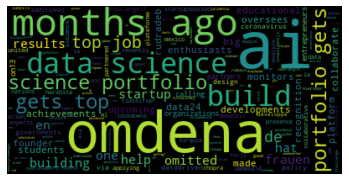

In [26]:
wordcloud = WordCloud(stopwords=STOPWORDS).generate(final)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

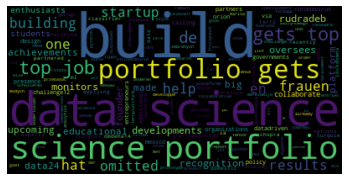

In [27]:
### By adding some more stops words in list 
wordcloud = WordCloud(stopwords=set(list(STOPWORDS)+['day','ai','ago','hour','months','omdena'])).generate(final)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Reference https://www.analyticsvidhya.com/blog/2018/11/introduction-text-summarization-textrank-python/

# Summarization 

### Reference
https://github.com/dipanjanS/text-analytics-with-python/

In [28]:
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt') # one time execution
import re
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rinki\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [29]:
final_list=google_text_data+tweets_list

In [30]:
cleanedList = [x for x in final_list if str(x) != 'nan']

In [31]:
from gensim.summarization import summarize

In [32]:
document='.'.join(cleanedList)

In [33]:
import re

DOCUMENT = re.sub(r'\n|\r', ' ', document)
DOCUMENT = re.sub(r' +', ' ', DOCUMENT)
DOCUMENT = DOCUMENT.strip()

In [34]:
DOCUMENT

'2 months ago · Omdena is a company that uses its expansive community of voluntary engineers to create lasting change through projects that take just two.4 months ago · Omdena is a global platform that uses a bottom-up collaborative model to build AI and ML solutions. People from all over the world come.12 months ago · Omdena and its Covid19 project are displayed on the Nasdaq billboard in . Omdena is an innovation platform for building AI solutions to.4 months ago · A leader in collaborative AI development, Omdena believes that truly great startups should build solutions that positively change the world by.17 months ago · Omdena is a collaborative platform for building AI solutions to real-world problems through the power of bottom up collaboration.13 months ago · Rudradeb Mitra, is the Founder of Omdena a global platform where a community of changemakers building AI solutions to real-world problems.7 months ago · Bambini introduced on Omdena, a global platform where AI experts and da

In [35]:
print(summarize(DOCUMENT, ratio=0.2, split=False))

2 months ago · Omdena is a company that uses its expansive community of voluntary engineers to create lasting change through projects that take just two.4 months ago · Omdena is a global platform that uses a bottom-up collaborative model to build AI and ML solutions.
Omdena is a global platform that uses a bottom-up collaborative model to build AI.7 months ago · Omdena in India is extending freelancing into AI enabled FAST teaming in the non-profit world, and Spacely here in the US is bringing.1 month ago · Maybe it's a compelling cause which helps Omdena - collaboratively solving social problems in developing countries using AI – attract.13 months ago · One of the biggest challenges within artificial intelligence (AI) surrounds specialized acceleration hardware such as graphics processing units.5 months ago · SANSA has also executed a project that uses Satellite Imagery and AI to locate informal settlements.
#BigData #Analytics #DataScience #AI #IoT #IIoT #PyTorch #Python #RStats #Ten

In [41]:
print(summarize(DOCUMENT, word_count=75, split=False))

Omdena is a global platform that uses a bottom-up collaborative model to build AI.7 months ago · Omdena in India is extending freelancing into AI enabled FAST teaming in the non-profit world, and Spacely here in the US is bringing.1 month ago · Maybe it's a compelling cause which helps Omdena - collaboratively solving social problems in developing countries using AI – attract.13 months ago · One of the biggest challenges within artificial intelligence (AI) surrounds specialized acceleration hardware such as graphics processing units.5 months ago · SANSA has also executed a project that uses Satellite Imagery and AI to locate informal settlements.


In [36]:

import nltk

sentences = nltk.sent_tokenize(DOCUMENT)
len(sentences)

25

In [37]:
import numpy as np
import re

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

In [38]:
norm_sentences = normalize_corpus(sentences)
norm_sentences[:3]

array(['months ago omdena company uses expansive community voluntary engineers create lasting change projects take two months ago omdena global platform uses bottomup collaborative model build ai ml solutions',
       'people world come months ago omdena covid project displayed nasdaq billboard',
       'omdena innovation platform building ai solutions months ago leader collaborative ai development omdena believes truly great startups build solutions positively change world months ago omdena collaborative platform building ai solutions realworld problems power bottom collaboration months ago rudradeb mitra founder omdena global platform community changemakers building ai solutions realworld problems months ago bambini introduced omdena global platform ai experts data scientists diverse backgrounds collaborate create'],
      dtype='<U909')

## Conclusion

We found that the this gensim method seems the best method and gives better summarization in this case